# Final Project

# **Predicting Fat Levels in Canadian Cheese Using Machine Learning**

## **Mariwan Ibrahim**

## Introduction

This study focuses on harnessing the power of machine learning to predict fat levels in Canadian cheese. By leveraging comprehensive different types of Canadian cheese datasets encompassing diverse cheese varieties, production methods, and regional factors and our **goal** is to develop  supervised machine learning models capable of accurately estimating fat content across different cheese types. The __question__ is that can we predict the fat levels in Candadian cheese based on these characteristics in the dataset?. At the end of this project, I __expect__ to have developed machine learning models that can efficiently predict or classify fat levels in Canadian cheese based on their attributes. Additionally, I would like to gain insights into the most influential features for fat level classification. The implications of this project extend beyond cheese production efficiency. Accurate fat content prediction can facilitate better inventory management, optimize production processes, and ensure consistency in product quality, ultimately benefiting both cheese manufacturers and consumers. Furthermore, This project is __significant__, by integrating machine learning driven fat content prediction into quality control protocols, cheese producers can enhance compliance with regulatory standards and industry guidelines, fostering trust and credibility among stakeholders. As it is known that the target of dataset is a binary classification so this project falls under __supervised machine learning classification__.

## Exploratory Data Analysis 

In this section, I will explore the cheese_data.csv dataset to obtain a better understanding of data structure and contents. I will do various analyses to identify patterns, trends, and potential issues in the dataset.

#### 1. Reading Dataset
Firstly, I will be loading the dataset using the pandas library. While reading the dataset I will be dropping two columns CheeseId and RindTypeEn because CheeseId does not provide any valuable information regarding fat level and I did not use RindTypeEn in our analysis for convenience.

In [2]:
# Importing pandas and numpy libraries
import pandas as pd
import numpy as np

# Loading dataset 
df = pd.read_csv('data/cheese_data.csv')
# Dropping two columns
df.drop(columns = ['CheeseId', "RindTypeEn"], inplace=True)
df.head(10)

,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,CheeseName,FatLevel
0,NB,Farmstead,47.0,"Sharp, lactic",Uncooked,0,Firm Cheese,Ewe,Raw Milk,Sieur de Duplessis (Le),lower fat
1,NB,Farmstead,47.9,"Sharp, lactic, lightly caramelized",Uncooked,0,Semi-soft Cheese,Cow,Raw Milk,Tomme Le Champ Doré,lower fat
2,ON,Industrial,54.0,"Mild, tangy, and fruity","Pressed and cooked cheese, pasta filata, inter...",0,Firm Cheese,Cow,Pasteurized,Provolone Sette Fette (Tre-Stelle),lower fat
3,NB,Farmstead,47.0,Sharp with fruity notes and a hint of wild honey,NaN,0,Veined Cheeses,Cow,Raw Milk,Geai Bleu (Le),lower fat
4,NB,Farmstead,49.4,Softer taste,NaN,1,Semi-soft Cheese,Cow,Raw Milk,Gamin (Le),lower fat
5,NB,Industrial,48.0,NaN,Classic fresh cooking cheeses,0,Fresh Cheese,Cow,Pasteurized,Paneer (Northumberland Co-operative),lower fat
6,ON,Industrial,52.0,"Rich, creamy, buttery, both subtle and tangy i...",NaN,0,Soft Cheese,Goat,Pasteurized,Goat Brie (Woolwich),lower fat
7,ON,Industrial,41.0,Mild,"Whitem, smooth, firm textured",0,Firm Cheese,Goat,Pasteurized,Goat Cheddar (Woolwich),lower fat
8,ON,Industrial,50.0,Mild,NaN,0,Semi-soft Cheese,Goat,Pasteurized,Goat Mozarella (Woolwich),lower fat
9,ON,Industrial,55.0,"Sharp, tangy, salty",With or without brine,0,Soft Cheese,Goat,Pasteurized,Goat Feta (Woolwich),lower fat


#### 2. Data Description
Next, let's generate a summary of the dataset and get an idea about shape of the data, data types of each column, missing values and basic statistics.

In [3]:
# This class is to create table and figure numbers
class color:
   BLUE = '\033[94m'
   BOLD = '\033[1m'
   END = '\033[0m'

print(color.BOLD + color.BLUE + "\nTable 1: Data Description" + color.END)
df.describe(include='all')


Table 1: Data Description


,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,CheeseName,FatLevel
count,1042,1042,1028.000000,801,643,1042.000000,1019,1041,977,1042,1042
unique,10,3,NaN,635,535,NaN,6,8,3,1038,2
top,QC,Industrial,NaN,Mild,Creamy,NaN,Firm Cheese,Cow,Pasteurized,Ménestrel (Le),lower fat
freq,796,455,NaN,59,19,NaN,349,743,800,2,684
mean,NaN,NaN,47.069747,NaN,NaN,0.095010,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,9.592647,NaN,NaN,0.293369,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,12.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,40.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,46.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,52.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


In [4]:
print(color.BOLD + color.BLUE + "\nTable 2: Data Type and Information" + color.END)
df.info()


Table 2: Data Type and Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ManufacturerProvCode  1042 non-null   object 
 1   ManufacturingTypeEn   1042 non-null   object 
 2   MoisturePercent       1028 non-null   float64
 3   FlavourEn             801 non-null    object 
 4   CharacteristicsEn     643 non-null    object 
 5   Organic               1042 non-null   int64  
 6   CategoryTypeEn        1019 non-null   object 
 7   MilkTypeEn            1041 non-null   object 
 8   MilkTreatmentTypeEn   977 non-null    object 
 9   CheeseName            1042 non-null   object 
 10  FatLevel              1042 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 89.7+ KB


The above table 1 and table 2 display that the dataset has 1042 rows with ten features and a target. The majority of features are object type, there are only two numeric attributes and one of them is a binary feature (0, 1). The following is the detail of each column.

- ManufacturerProvCode has 10 unique values, one of the top categories is QC with frequency 796.
- ManufacturingTypeEn has 3 unique categories, one of the top categories is Industrial with fequency 455.
- MoisturePercent is a numeric feature with 14 missing values and the mean and median are very close so it has a symmetrical distribution.
- FlavourEn contains 635 unique values, the top category is Mild with 59 frequency, it has 241 missing values and is treated as text feature.
- CharacteristicsEn contains 535 unique categories, the top category is Creamy with 19 frequency, this feature has many missing values (399 null values) and is treated as text feature.
- Organic is a numeric feature encoded 0 and 1.
- CategoryTypeEn has 6 unique values, the top category is Firm Cheese with frequency 349 and contains 23 null values.
- MilkTypeEn has 8 unique categories, the top category is Cow with frequency 743 and contains one missing value. it seems the Manufacturers use Cow milk way more than other animal milk.
- MilkTreatmentTypeEn has 3 unique values, the top one is Pasteurized with the most frequency 800 and contains 65 null values. Based on this information, most of the cheese producers use pasteurization to treat milk.
- CheeseName is text feature and each cheese has different names.
- FatLevel is the target of the dataset and has two classes lower fat and higher fat.

#### 3. Missing Values
It is very important to check each column's null values and how to deal with them. Let's show each column with it's null values in a dataframe.

In [5]:
print(color.BOLD + color.BLUE + "\nTable 3: Data Missing Values" + color.END)
pd.DataFrame(df.isnull().sum()).reset_index().rename(columns={ 'index':'Columns', 0:'Null values'})


Table 3: Data Missing Values


,Columns,Null values
0,ManufacturerProvCode,0
1,ManufacturingTypeEn,0
2,MoisturePercent,14
3,FlavourEn,241
4,CharacteristicsEn,399
5,Organic,0
6,CategoryTypeEn,23
7,MilkTypeEn,1
8,MilkTreatmentTypeEn,65
9,CheeseName,0


In the above table 3, there are only two features __FlavourEn__ and __CharacteristicsEn__ contain many null values. These features are text so I will be replacing these null values to 'unknown'. As we see some of other features have a few null values and I will make a use of imputation with strategy of constant for categorical features and strategy of median for the numeric feature during the preprocessing.

In [6]:
# Replacing null values to unknown in both features FlavourEn and CharacteristicsEn
df['FlavourEn'] = df['FlavourEn'].fillna('unknown')
df['CharacteristicsEn'] = df['CharacteristicsEn'].fillna('unknown')

#### 4. Data Visualization
So far, we have had a basic idea about the dataset so I will extend the data analysis with some visualizations using altair library and see the distribution of each feature except text features. As we know there is only one numeric feature and the rest are categorical. I will generate a histogram plot for numeric feature and bar plot for categorical features.

In [9]:
# importing altair library
import altair as alt

# Making histogram plot for Moisture Percent feature 
plot1 = alt.Chart(df, width = 500, height = 300).mark_bar().encode(
            x = alt.X('MoisturePercent:Q', bin = alt.Bin(maxbins = 30), title = 'Moisture Percent'),
            y = alt.Y('count()', title = 'Frequency')
).properties(title = 'Distribution of Moisture Percent')
display(plot1)

# create figure for the plot.
print(color.BOLD + color.BLUE + "Figure 1: Distribution of Moisture Percent\n" + color.END)

alt.Chart(...)

Figure 1: Distribution of Moisture Percent



The above histogram shows the distribution of Moisture Percent feature and it seems to be normally distributed. Beside this, I see a few outliers, but they might not cause an issue.

Let's visualize the same feature, but in this time we add target classes and check the distribution of each class.

In [13]:
# Generating histogram for each class of Fat Level based on Moisture Percent
plot2 = alt.Chart(df, width = 400, height = 200).mark_bar().encode(
            x = alt.X('MoisturePercent', bin = alt.Bin(maxbins = 30), title = 'Moisture Percent'),
            y = alt.Y('count()', title = 'Frequency'),
            color = alt.Color('FatLevel'),
            column = alt.Column('FatLevel', title = None)
).properties(title = 'Distribution of Moisture Percent for Each Class' )
display(plot2)

# Ctreating figure number
print(color.BOLD + color.BLUE + "Firgue 2: Distribution of Moisture Percent for Each Class\n" + color.END)

alt.Chart(...)

Firgue 2: Distribution of Moisture Percent for Each Class



In the above histograms, lower fat has a better distribution than higher fat in Moisture Percent feature. It is because lower fat has more data. In general, the distribution of both classes looks normaly distributed in Moisture Percent feature and this feature appears to be one of the most useful in differentiating the target classes.

Now it is time to visualize the categorical features and take a look at their distributions.

In [15]:
# Puting all categorical feature column names in a list
categorical_feature = ['ManufacturerProvCode', 'ManufacturingTypeEn', 'Organic', 'CategoryTypeEn', 'MilkTypeEn', 'MilkTreatmentTypeEn']

def bar_plot(data, feature):
    """
    This plots a bar chart of a feature.
    
    Parameters
    ----------
    data: pandas.core.frame.DataFrame
    feature: str
            It is the feature name and it must be in the data frame.
    
    Returns
    -------
    altair.vegalite.v3.api.Chart
        an Altair bar chart 
    """
    if feature == 'Organic':
        plot = alt.Chart(data, width = 400, height = 200).mark_bar().encode(
                x = alt.X(feature + ':O', sort = 'y'),
                y = alt.Y('count()', title = 'Frequency')
            ).properties(title = 'Distribution of Organic')
    else:
        plot = alt.Chart(data, width = 500, height = 300).mark_bar().encode(
                x = alt.X(feature, sort = 'y'),
                y = alt.Y('count()', title = 'Frequency')
            ).properties(title = 'Distribution of ' + feature)
    
    return plot

# It iterates each feature through above function which returns a bar plot for each feature.
x = 3
for col in categorical_feature:
    display(bar_plot(df, col))
    print(color.BOLD + color.BLUE + f"Firgue {x}: Distribution of {col}\n" + color.END)  # Creating figure number
    x += 1

alt.Chart(...)

Firgue 3: Distribution of ManufacturerProvCode



alt.Chart(...)

Firgue 4: Distribution of ManufacturingTypeEn



alt.Chart(...)

Firgue 5: Distribution of Organic



alt.Chart(...)

Firgue 6: Distribution of CategoryTypeEn



alt.Chart(...)

Firgue 7: Distribution of MilkTypeEn



alt.Chart(...)

Firgue 8: Distribution of MilkTreatmentTypeEn



In the above bar plots, that can be clearly seen the majority of categorical features are skewed such as __ManufacturerProvCode__ has 76% QC and 24% others , **Organic** has 90% 0 and 10% 1, **MilkTypeEn** has 71% cow and 29% others and **MilkTreatmentTypeEn** has 82% Pasteurized and 18% others. I do not expect they will have much influence on differentiating the target classes.

#### 5. Balanced or Imbalanced Target Classes
I will be going though the target classes and creating a percentage table, which shows the percentage of each class in the dataset to check whether the target classes are banalanced or imbalanced.

In [16]:
print(color.BOLD + color.BLUE + "\nTable 4: Distribution Target Classes " + color.END)
# finding the frequency table for FatLevel, normalize the table, reset the index and rename the columns.
pd.DataFrame(df['FatLevel'].value_counts(normalize = True)).reset_index().rename(columns={'index':'FatLevel', 'FatLevel':'Percentage'})


Table 4: Distribution Target Classes 


,FatLevel,Percentage
0,lower fat,0.65643
1,higher fat,0.34357


Yes, the target classes are imbalanced. The target has 66% of lower fat and 34% of higher fat so I will deal with imbalanced classes during machine learning process. I will use __class_weight__ parameter in the estimators to reduce the effect of imbalancing classes a little bit. 

#### 6. Split Dataset
I will start by defining the features and target variables. The features consist of 'ManufacturerProvCode', 'ManufacturingTypeEn', 'MoisturePercent',
'FlavourEn', 'CharacteristicsEn', 'Organic', 'CategoryTypeEn', 'MilkTypeEn', 'MilkTreatmentTypeEn' and 'CheeseName'. I will split the dataset into training and testing sets by using test size 20 and train size 80.

In [17]:
# Import the library to split the dataset
from sklearn.model_selection import train_test_split

# Defining X for features and y for target
X = df.drop(columns = 'FatLevel')
y = df['FatLevel']

# Split X and y into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 777)
X_train.head()

,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,CheeseName
9,ON,Industrial,55.0,"Sharp, tangy, salty",With or without brine,0,Soft Cheese,Goat,Pasteurized,Goat Feta (Woolwich)
151,MB,Farmstead,42.0,unknown,unknown,0,Semi-soft Cheese,Cow,Pasteurized,Farmers (Bothwell)
68,BC,Artisan,48.0,Delicate note of mushroom,unknown,0,Soft Cheese,Cow,Pasteurized,Triple Cream Camembert
970,QC,Farmstead,55.0,unknown,unknown,1,Firm Cheese,Cow,NaN,Judicieux (Le)
928,QC,Farmstead,36.0,unknown,unknown,0,Firm Cheese,Cow,Pasteurized,Ménestrel (Le)


#### 7. Classification Report
I will be choosing classification report to evaluate the final and best estimator. The classification report displays all metrics scores (accuracy, precision, recall and F1-score) for each class, along with the support (number of instances) for each class. The macro avg and weighted avg provide the average scores across all classes, with macro avg treating all classes equally and weighted avg considering the class imbalance.  
- __Precision:__ Percentage of correct positive predictions relative to total positive predictions.
- __Recall:__ Percentage of correct positive predictions relative to total actual positives.
- __F1-score:__ A weighted harmonic mean of precision and recall and provides a balance between precision and recall.
- __Support:__ number of instances in each class.

## Preprocessing

In this section, the features will be split into three parts **numeric**, **categorical** and **text** features. We have only one numeric feature, which is 'MoisturePercent' and 'Organic' was a categorical feature, was already encoded and converted to numeric so I keep 'Organic' feature as remaining and by setting remainder='passthrough' it will be appended to the end of the transformation. The categorical features are 'ManufacturerProvCode', 'ManufacturingTypeEn', 'CategoryTypeEn', 'MilkTypeEn' and 'MilkTreatmentTypeEn'. The text features are 'FlavourEn', 'CharacteristicsEn' and 'CheeseName'.  

First, I will create a **list** for each type of feature and place them in their lists according to their types. **Simple Imputer** will be used to fill up the null values with the strategy of constant for categorical features and strategy of median for the numeric feature. I already filled up the null values in text features with 'unknown' value because I can not use imputation and CountVectorizer together in a pipeline, the reason is that imputation needs 2 dimensinal data and CountVectorizer accepts only 1 dimensional data. Additionally, I will take advantage of parameter stop_words to ask CountVectorizer to eliminate the unknown values.  

The numeric feature will be standardized by **StandardScaler** transformation, the categorical features will be encoded and converted to numeric type by **OneHotEncoder** transformation and the last one text featrues will be converted to a matric and each unique word becomes a column by **CountVectorizer** transformation. After that, we make a pipeline for each type of feature to perform the imputation and transformation. Finally, column transformer will be utilized to carry out transformer to columns.  

In [18]:
# Importing all necessary libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

# Numeric feature
numeric_feature = ['MoisturePercent']
# Categorical feature
categorical_feature = ['ManufacturerProvCode', 'ManufacturingTypeEn', 'CategoryTypeEn', 'MilkTypeEn', 'MilkTreatmentTypeEn']
# text feature
text_feature = ['FlavourEn', 'CharacteristicsEn', 'CheeseName']

# Make a pipeline for numeric feature
numeric_pipe = make_pipeline(SimpleImputer(strategy = 'median'), StandardScaler())

# Make a pipeline for categorical features
categorical_pipe = make_pipeline(SimpleImputer(strategy = 'constant', fill_value = 'missing'), OneHotEncoder(dtype = int, handle_unknown = 'ignore'))

# Make a pipeline for each text feature
text1_pipe = make_pipeline(CountVectorizer(stop_words = ['unknwon']))
text2_pipe = make_pipeline(CountVectorizer(stop_words = ['unknwon']))
text3_pipe = make_pipeline(CountVectorizer())

# Create a column transformer to combine all transformation
col_transformer = make_column_transformer((numeric_pipe, numeric_feature),
                                          (categorical_pipe, categorical_feature),
                                          (text1_pipe, 'FlavourEn'),
                                          (text2_pipe, 'CharacteristicsEn'),
                                          (text3_pipe, 'CheeseName'),
                                          remainder = 'passthrough')

## Methods & Results
Now We don’t know which algorithms would be good on this problem or what configurations to use, but we have got an idea from the data analysis.  
In this section, I will start by training a baseline model (Dummy Classifier) with strategy of most frequent then proceed to train a basic model (Decision Tree Classifier) and carry out 10 folds cross validation on the training dataset. Additionally, some of suitable supervised machine learning models will be performed on the training dataset along with 10 folds cross validation. The parameter of __class_weight__ will used with all estimators to reduce the effect of imbalancing classes.  

The best models will be chosen according to their training scores and cross validation scores. Next, we will do hyper-parameter optimization using GridSearchCv to search and find the best hyper-parameter values for the models. Furthermore, the best model with it's best hyper-parameter will be tested on the test set and we will be displaying confusion matrix to visualize the predictions made by the model compared to the actual labels in the test set. At the end, we will show the classification report to evaluate the model.

#### 1. Dummy Classification
Our baseline model is the dummy classification with strategy of most frequent. 

In [19]:
# Importing dummy classification model
from sklearn.dummy import DummyClassifier

# Create the model object
model_dummy = DummyClassifier(strategy = 'most_frequent')

# Fit the model on training sets
model_dummy.fit(X_train, y_train)

# Finding training score 
dummy_score = model_dummy.score(X_train, y_train)
print(f'Dummy train score: {dummy_score}')

Dummy train score: 0.6578631452581032


The accuracy of dummy classification model is 0.658, which was already expected because dummy classification ignores the inputs and it relies on target with the most frequency occurence.  

#### 2. Decision Tree Classification
Let's test decision tree classification model on the training sets. 

In [20]:
# Importing decision tree classification 
from sklearn.tree import DecisionTreeClassifier

# Create model object
tree_pipe = make_pipeline(col_transformer, DecisionTreeClassifier(class_weight='balanced'))

# Fit the model on training set
tree_pipe.fit(X_train, y_train)

# Checking the training score
tree_score = tree_pipe.score(X_train, y_train)
print(f'Decision tree train score: {tree_score}')

Decision tree train score: 1.0


That is very interesting, decision tree classification produced full accuracy 100% so let's carry out a __cross validation__ on the training set with decision tree classification model to check whether the model is overfiting or not and whether the model would fail to predict the actual classes or not.

In [21]:
# Import cross validate library
from sklearn.model_selection import cross_validate

# Create model object
cv_pipe = make_pipeline(col_transformer, DecisionTreeClassifier(random_state = 77, class_weight='balanced'))

# Cross validate 
cv = cross_validate(cv_pipe, X_train, y_train, cv = 10, return_train_score = True)

# Mean of cross validation score
cv_mean = cv['test_score'].mean()
print(f'\nMean of cross validation scores: {cv_mean}')

# Finding standard deviation of cross validation scores
cv_std = cv['test_score'].std()
cv_std = print(f'Standard deviation of cross validation scores: {cv_std}\n')

# convert dictionary to dataframe
cv_df = pd.DataFrame(cv)
print(color.BOLD + color.BLUE + "\nTable 5: Cross Validation Result" + color.END)
cv_df


Mean of cross validation scores: 0.8464142283419391
Standard deviation of cross validation scores: 0.04421067942893367


Table 5: Cross Validation Result


,fit_time,score_time,test_score,train_score
0,0.085444,0.018097,0.869048,1.0
1,0.077929,0.020544,0.845238,1.0
2,0.075426,0.018149,0.761905,1.0
3,0.074316,0.019027,0.903614,1.0
4,0.075473,0.018110,0.903614,1.0
5,0.071789,0.017799,0.807229,1.0
6,0.080019,0.017884,0.879518,1.0
7,0.074520,0.018223,0.807229,1.0
8,0.074513,0.017620,0.867470,1.0
9,0.077519,0.017273,0.819277,1.0


In above cross validation table, I can see that the model is overfitting. Let's explain the folds of cross validation, the standard deviation of cross validation scores is 0.044 and kind of big, which means there is an insignificant difference between each fold of cross validation scores as it can be seen in the above table. While cross validation scores are fluctuating, the training score is 100% for every signle fold. I guess it is because the categorical features are skewed, have imbalanced categories and the target classes are imbalanced as we are aware of that.

#### 3. Different Algorithms
I will be examining the following models on the training dataset with default hyper-parameter and performing 10-fold cross validation on training set along with parameter class weight. Denote that KNeighbors Classification model does not have the parameter of class weight.
- _Random Forest Classification_
- _KNeighbors Classification_
- _Suport Vector Classification_
- _Logistic Regression_

In [22]:
# Importing all models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Creating a dictionary to get training and testing scores with name of estimators
result_dict = {'estimators':[], 'mean train score':[], 'mean cv score':[]}

# Creating a dictionary that contains all models
models = {'Forest':RandomForestClassifier(class_weight='balanced'),
          'KNN':KNeighborsClassifier(),
          'SVC':SVC(class_weight='balanced'),
          'Logistic':LogisticRegression(class_weight='balanced')}

# For loop to iterate through each model
for name, model in models.items():
    model_pipe = make_pipeline(col_transformer, model)
    cv = cross_validate(model_pipe, X_train, y_train, cv = 10, return_train_score = True)
    result_dict['estimators'].append(name)
    result_dict['mean train score'].append(cv['train_score'].mean())
    result_dict['mean cv score'].append(cv['test_score'].mean())

# convert result_dict to data frame
result_df = pd.DataFrame(result_dict)
print(color.BOLD + color.BLUE + "\nTable 6: Different Models with CV result" + color.END)
result_df


Table 6: Different Models with CV result


,estimators,mean train score,mean cv score
0,Forest,1.000000,0.824771
1,KNN,0.852610,0.773193
2,SVC,0.947579,0.800904
3,Logistic,0.966654,0.779389


Well, it looks like **Random Forest Classification** has a better mean cross validation score compared to other estimators and a better training score. I would also like to take **decision tree classification** along with this estimator because it has a good mean cross validation score too.

#### 4. Automated Hyper-parameter Optimization
We have chosen two good estimators (Decision Tree Classifier and Random Forest Classifier) based on their mean cross validation scores and training scores with default hyper-parameter and in this section, we will add hyper-parameters to these models and optimize them.  

__GridSearchCV__  
It is to search and find the best hyper-parameters from a given set of hyper-parameter values for a specified estimator. The hyper-parameters of the selected models are like below 
- Decision Tree Classification: max_depth and min_samples_split
  - **max_depth:** The maximum depth of the tree. I will take a range from 1 to 30.
  - **min_samples_split:** The minimum number of samples required to split an internal node. I will take a range 2 to 10.
- Random Forest Classification: max_depth and n_estimators
  - **max_depth:** The maximum depth of the tree. I will take numbers from 1 to 30.
  - **n_estimators:** The number of trees in the forest. By default, it is 100 trees so I will increase it until 110.

**Decision Tree Classification**

In [23]:
# Importing the GridSearchCV model
from sklearn.model_selection import GridSearchCV

# hyper-parameter values
param_grid = {'decisiontreeclassifier__max_depth':list(range(1,30)), 'decisiontreeclassifier__min_samples_split':list(range(2,10))}

# model object
tree_model = make_pipeline(col_transformer, DecisionTreeClassifier(random_state=123, class_weight='balanced'))

# Using GridSearchCV to find the hyper-parameter
grid_search_1 = GridSearchCV(tree_model, param_grid, cv=10, verbose=0, n_jobs=-1, return_train_score=True)
grid_search_1.fit(X_train, y_train)

# best hyper-parameter
best_param = grid_search_1.best_params_
# best mean cv score
best_score = grid_search_1.best_score_
# training score on the best hyper-parameter
train_score_param = grid_search_1.score(X_train, y_train)
print(f'Best hyper-parameters: {best_param}\nBest cv score: {best_score}\nTrain score: {train_score_param}')

Best hyper-parameters: {'decisiontreeclassifier__max_depth': 11, 'decisiontreeclassifier__min_samples_split': 2}
Best cv score: 0.8500143430866322
Train score: 0.9747899159663865


GridSearchCV found max depth 11 and minimum samples split 2 as the best hyper-parameter values for decision tree classification model, that produced the best cross validation score 0.85 and training score 0.975. Well, the hyper-parameters have reduced overfitting.

**Random Forest Classification**

In [24]:
# hyper-parameter values
param_grid = {'randomforestclassifier__max_depth':list(range(1,30)), 'randomforestclassifier__n_estimators':list(range(100,110))}

# model object
forest_model = make_pipeline(col_transformer, RandomForestClassifier(random_state=123, class_weight='balanced'))

# Using GridSearchCV to find the hyper-parameter
grid_search_2 = GridSearchCV(forest_model, param_grid, cv=10, verbose=0, n_jobs=-1, return_train_score=True)
grid_search_2.fit(X_train, y_train)

# best hyper-parameter
best_param = grid_search_2.best_params_
# best mean cv score
best_score = grid_search_2.best_score_
# training score on the best hyper-parameter
train_score_param = grid_search_2.score(X_train, y_train)
print(f'Best hyper-parameters: {best_param}\nBest cv score: {best_score}\nTrain score: {train_score_param}')

Best hyper-parameters: {'randomforestclassifier__max_depth': 22, 'randomforestclassifier__n_estimators': 101}
Best cv score: 0.8260327022375215
Train score: 0.985594237695078


GridSearchCV selected max depth 22 and number of trees 101 as the best hyper-parameter values for Rnadom Forest Classification with the best cross validation score 0.83 and training score 0.99.

#### 5. Model Selection
So far Decision Tree Classification and Random Forest Classification models have been chosen and optimized. I will apply both estimators with their best hyper-parameters on test dataset and I will pick the one that does a better job. I do expect that random forest classifier will be better.  
- __grid_search_1__ is the decision tree classifier model with the best hyper-parameters.
- __grid_search_2__ is the Random Forest Classifier model with the best hyper-parameter.

In [25]:
test_score_tree = grid_search_1.score(X_test, y_test)
test_score_forest = grid_search_2.score(X_test, y_test)
print(f'Decision tree test score: {test_score_tree}\nRandom forest test score:{test_score_forest}')

Decision tree test score: 0.8181818181818182
Random forest test score:0.8564593301435407


As we see that Random Forest with it's best hyper-parameters does better than Decision Tree with it's hyper-parameters, it is because random forest classifier fits a number of decision tree classifiers on various sub-samples of dataset and uses averaging to improve the predictive accuracy and control over-fitting. Decision tree classifier is just like a tree in random forest classifier so that I will go with **random forest classifier** model to predict the target.  

#### 6. Confusion Matrix and Classification Report
I will be going to use Random Forest Classifier to predict the label classes, display the confusion matrix that helps us understand where the model is making correct predictions and where it is struggling. Classification report will also be printed out to evaluate the performance of the model for each class.

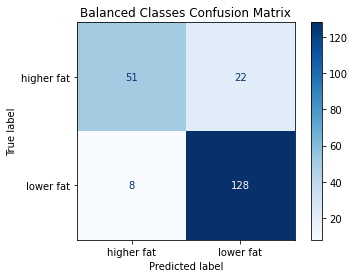

Figure 9: Confusion Matrix Balanced Classes



In [27]:
# Importing confusion matrix and classification report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# predict label on test set
y_pred = grid_search_2.predict(X_test)

# Display confusion matrix
cm_plot = plot_confusion_matrix(grid_search_2, X_test, y_test, cmap='Blues')
plt.title('Balanced Classes Confusion Matrix')
plt.show()
print(color.BOLD + color.BLUE + "Figure 9: Confusion Matrix Balanced Classes\n" + color.END)

The model predicted 51 higher fat out of 73 correctly, but predicted 22 lower fat incorrectly, actually they were supposed to be higher fat.  
The model predicted 128 lower fat out of 136 correctly, but predicted 8 hgiher fat incorrectly, actually they were supposed to be lower fat. The total of all classes were predicted by the model incorrectly are 30, it is because of the model accuracy.

Let's create the classification report to evaluate the model.

In [28]:
# Classification report
report = classification_report(y_test, y_pred)
print(color.BOLD + color.BLUE + "\nTable 7: Classification Report of Balanced Classes" + color.END)
print(report)


Table 7: Classification Report of Balanced Classes
              precision    recall  f1-score   support

  higher fat       0.86      0.70      0.77        73
   lower fat       0.85      0.94      0.90       136

    accuracy                           0.86       209
   macro avg       0.86      0.82      0.83       209
weighted avg       0.86      0.86      0.85       209



Classification report shows that the overall accuracy of model is 0.86 that indicates that the model has ability to predict classes correctly for 86% of examples in the test dataset. I notice that the model performed well in predicting lower fat class with precision 0.85, recall 0.94 and f1-score 0.9, which means out of all lower fat that the model predicted lower fat is 85%, actually they were and out of all lower fat that are actually lower fat, the model predicted 94% of them correctly. F1-score of lower fat class is close to 1, indicating a well model performance. I also notice that the model did not do a great job in predicting higher fat class. Let's look at precision, recall and f1-score of higher fat in classification report, we can see that out of all higher fat that the model predicted higher fat that were actually higher fat is 86%, the model did a good job at precision but out of all higher fat that are actually higher fat, the model predicted only 70% of them correctly and the model performance fell down at this point, even the f1-score is not very close to 1.

Let's display confusion matrix and print out the classification report for imbalanced fat level classes. I will train Random Forest Classifier with it's best hyper-parameter values except class weight.


Figure 10: Confusion Matrix Imbalanced Classes


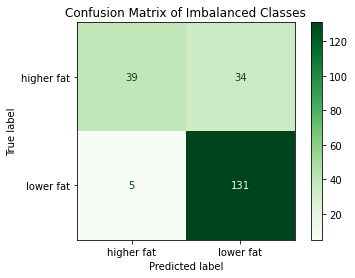

In [157]:
# Random forest classifier without class_weight
forest_imbalance = make_pipeline(col_transformer, RandomForestClassifier(random_state=12, max_depth=22, n_estimators=101))

# Fit the model on training set
forest_imbalance.fit(X_train, y_train)

# Predicting labels on test set
y_pred_imb = forest_imbalance.predict(X_test)

# Displaying confusion matrix for imbalanced label 
print(color.BOLD + color.BLUE + "\nFigure 10: Confusion Matrix Imbalanced Classes" + color.END)
cm_plot_imb = plot_confusion_matrix(forest_imbalance, X_test, y_test, cmap='Greens')
plt.title('Confusion Matrix of Imbalanced Classes')
plt.show()

In [159]:
# Classification report for imbalanced label
report_imb = classification_report(y_test, y_pred_imb)
print(color.BOLD + color.BLUE + "\nTable 8: Classification Report of Imbalanced Classes" + color.END)
print(report_imb)


Table 8: Classification Report of Imbalanced Classes
              precision    recall  f1-score   support

  higher fat       0.89      0.53      0.67        73
   lower fat       0.79      0.96      0.87       136

    accuracy                           0.81       209
   macro avg       0.84      0.75      0.77       209
weighted avg       0.83      0.81      0.80       209



Imbalanced labels made a considerable change in confusion matrix and classification report. As long as we removed class_weight balanced in the model, the overall accuracy of model went down from 0.86 to 0.81, the higher fat precision increased from 0.86 to 0.89 and higher fat recall decreased from 0.70 to 0.53, that is because the model predicted 34 lower fat incorrectly, actually they were supposed to be higher fat and it also predicted 5 lower fat incorrectly, actually they were supposed to be higher fat. It affected on lower fat precision, recall and f1-score as well. At this point, I just wanted to show how imbalanced classes affect on accuracy of model.

#### 7. Feature Importance
Feature importance in Random Forest classifier provides insight into which features have the most significant influence on the model's predictions. This information helps us in understanding the underlying patterns in the data and can be valuable for feature selection, model interpretation, and problem understanding.  

Random Forest classifier has an attribute **feature_importances_** provides each feature's importance score. The higher value, the feature is more important and sum of all feature importance values is 1. The importance of a feature is computed as total reduction of the criterion brought by that feature. It is also known as the Gini importance.  

The attribute of feature_importances_ does not return the column names, just the values of features' importances so we need to get the column names from column transformer and pipelines. The name of columns must be the same order of importances values and the best way to get the correct column names is to follow the column transformer steps, which transforms the features like below:
- numeric feature
- categorical feature
- first text feature (FlavourEn)
- second text feature (CharacteristicsEn)
- third text feature (CheeseName)
- remainder feature ('Organic')

I will be showing the 5 top of important features that have the most influence on the model's predictions.

In [160]:
# numeric feature column name
numeric_feature_column = numeric_feature

# categorical feature column names
categorical_feature_columns = (grid_search_2.best_estimator_.named_steps['columntransformer'].
                               named_transformers_['pipeline-2'].named_steps['onehotencoder'].
                               get_feature_names(categorical_feature).tolist())

# FlavourEn text feature and each unique world is a column
text_feature_1 = sorted(grid_search_2.best_estimator_.named_steps['columntransformer'].
                        named_transformers_['pipeline-3'].named_steps['countvectorizer'].vocabulary_)

# CharacteristicsEn text feature and each unique world is a column
text_feature_2 = sorted(grid_search_2.best_estimator_.named_steps['columntransformer'].
                        named_transformers_['pipeline-4'].named_steps['countvectorizer'].vocabulary_)

# CheeseName text feature and each unique world is a column
text_feature_3 = sorted(grid_search_2.best_estimator_.named_steps['columntransformer'].
                        named_transformers_['pipeline-5'].named_steps['countvectorizer'].vocabulary_)

# Remainder feature name
remainder = ['Organic']

# Combine all feature names in the same order into a list 
column_names = numeric_feature_column + categorical_feature_columns + text_feature_1 + text_feature_2 + text_feature_3 + remainder

# Feature importances value for each column
feature_importance = grid_search_2.best_estimator_.named_steps['randomforestclassifier'].feature_importances_

# Creating a dataframe to show the 5 top of the most important features
feature_importance_df = (pd.DataFrame({'feature names':column_names, 'importance score':feature_importance}).
                         sort_values(by='importance score', ascending=False))

print(color.BOLD + color.BLUE + "\nTable 9: Feature Importances" + color.END)
feature_importance_df.head(5)


Table 9: Feature Importances


,feature names,importance score
0,MoisturePercent,0.127371
1232,cheddar,0.034547
13,CategoryTypeEn_Firm Cheese,0.033358
14,CategoryTypeEn_Fresh Cheese,0.022916
28,MilkTreatmentTypeEn_Pasteurized,0.019316


In summary, Moisture Percent feature has the most significant influence on the model's accurancy and predictions with the importance score 0.127. The scond most important feature is cheddar word in Cheese Name with importance score 0.035 and two categories of CategoryTypeEn feature have significant impact on the model's predictions. Furthermore, category Pasteurized of MilkTreatmentTypeEn feature is one of the most important feature. 

## Discussion

In this project, I implemented supervised machine learning models to determine which estimator is the best to predict the fat levels in Canadian cheese in accordance with their characteristics. I found that Random Forest Classifier model is the best among the estimators and it achieved an overall accuracy of 0.86, that indicates the model performed moderately well in classifying fat levels into the correct categories.  

Upon visualizing confusion matrix, the model performed well in predicting category of lower fat and it predicted 128 out of 136 correctly. I noticed that the model struggled to predict category of higher fat because it predicted 51 out of 73 correctly. 

According to classification report, the model is capable of predicting 94% of lower fat class correctly and out of all lower fats that the model predicts is 85% correct. Moreover, the model has ability to predict 70% of higher fat class correctly and all higher fats that the model predicts is 86% correct.  

Two possible reasons for the model's lower performance on higher fat class could be the imbalancing target classes, even we added class weight to the estimators but it does not make a significant change and the second one is that categories of some features have a fewer samples compared to others and I already mentioned that in data anaysis section. These may have affected the model's ability to generalize well to these categories.  

In addition, feature importance is another factor that has an instant influence on model's accuracy and predictions. The Random Forest Classifier provided us the most important features in the model and one of the most feature importance is Moisture Percent with a score 0.127 tripple heigher than the second important feature and we already expected. Cheddar of Cheese Name feature, Firm Cheese of CategoryTypeEn feature, Fresh Cheese of CategoryTypeEn feature and Pasteurized of MilkTreatmentTypeEn feature have significant effect on the model's predictions. The feature importances of Random Forest Classifier indicates that these features with imbalanced categories have no much impact on the model's accuracy and predictions. These findings suggest that the model's performance could be improved by addressing the imbalanced nature of the dataset.  

Overall, while the model showed promise in classifying fat levels into the correct categories, there is still room for improvement like below:
- Using a different strategy to deal with imbalancing classes such as stratify option in splitting dataset into train and test sets, changing dataset or adding more samples to the dataset.
- Collecting more data to solve the imbalanced feature's categories.

## References

1. Altair: A Declarative Visualization Library for Python, VanderPlas et al., IEEE Transactions on Visualization and Computer Graphics, Vol. 24, No. 1, pp. 366-375, 2018 [link](https://altair-viz.github.io/gallery/grouped_bar_chart.html)
2. Meduim: Classification Report Explained - Precision, Recall, Accuracy, Macro average, and Weighted Average [link](https://medium.com/@chanakapinfo/classification-report-explained-precision-recall-accuracy-macro-average-and-weighted-average-8cd358ee2f8a)
3. Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011 [link](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
4. Medium: Implementing ColumnTransformer for a dataset having columns of different data types [link](https://medium.com/analytics-vidhya/handling-heterogeneous-features-in-a-dataset-using-columntransformer-aa525ebe0486)
5. Stack Overflow: How to print bold text in Python [link](https://stackoverflow.com/questions/8924173/how-can-i-print-bold-text-in-python)
